In [1]:
#matplotlib hw 
#starting dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

#One observation from this data set is that gender of mice seemed to make no difference
#in the treatment of the tumor. 

#The second observation from this data set is placebo and stelasyn seem to have had
#the same effect on the tumor in treatment. 

#The third observation from this data set is that Ramicane had the greatest in treatment of 
#tumor volume at final time point. Giving the smallest tumor

In [2]:
#bring in the csv files
mouse_path = "csv/Mouse_metadata.csv"
study_path = "csv/Study_results.csv"

#create df
mouse_df = pd.read_csv(mouse_path)
study_df = pd.read_csv(study_path)

#finding multiples in study data
study_df = study_df.drop([137, 360, 620, 815, 950])
#merge data now that the drops have been made
complete_df = pd.merge(mouse_df, study_df)

In [3]:
#display preview 
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#creating summary statistics for each drug regimen 
complete_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [5]:
#creating df by drug regimen
capomulin_df = complete_df.loc[complete_df['Drug Regimen']=='Capomulin']

ramicane_df = complete_df.loc[complete_df['Drug Regimen']=='Ramicane']

ketapril_df = complete_df.loc[complete_df['Drug Regimen']=='Ketapril']

naftisol_df = complete_df.loc[complete_df['Drug Regimen']=='Naftisol']

zoniferol_df = complete_df.loc[complete_df['Drug Regimen']=='Zoniferol']

stelasyn_df = complete_df.loc[complete_df['Drug Regimen']=='Stelasyn']

placebo_df = complete_df.loc[complete_df['Drug Regimen']=='Placebo']

ceftamin_df = complete_df.loc[complete_df['Drug Regimen']=='Ceftamin']

infubinol_df = complete_df.loc[complete_df['Drug Regimen']=='Infubinol']

propriva_df = complete_df.loc[complete_df['Drug Regimen']=='Propriva']

In [6]:
#getting info 
capomulin_df['Tumor Volume (mm3)'].describe()

count    230.000000
mean      40.675741
std        4.994774
min       23.343598
25%       37.685933
50%       41.557809
75%       45.000000
max       48.158209
Name: Tumor Volume (mm3), dtype: float64

In [7]:
ramicane_df['Tumor Volume (mm3)'].describe()

count    228.000000
mean      40.216745
std        4.846308
min       22.050126
25%       36.674635
50%       40.673236
75%       45.000000
max       47.622816
Name: Tumor Volume (mm3), dtype: float64

In [8]:
ketapril_df['Tumor Volume (mm3)'].describe() 

count    188.000000
mean      55.235638
std        8.279709
min       45.000000
25%       48.232987
50%       53.698743
75%       60.870951
max       78.567014
Name: Tumor Volume (mm3), dtype: float64

In [9]:
naftisol_df['Tumor Volume (mm3)'].describe()

count    186.000000
mean      54.331565
std        8.134708
min       45.000000
25%       47.285874
50%       52.509285
75%       59.963034
max       76.668817
Name: Tumor Volume (mm3), dtype: float64

In [10]:
zoniferol_df['Tumor Volume (mm3)'].describe()

count    182.000000
mean      53.236507
std        6.966589
min       45.000000
25%       47.337876
50%       51.818479
75%       57.954259
max       73.324432
Name: Tumor Volume (mm3), dtype: float64

In [11]:
stelasyn_df['Tumor Volume (mm3)'].describe()

count    181.000000
mean      54.233149
std        7.710419
min       45.000000
25%       48.047139
50%       52.431737
75%       58.719297
max       75.123690
Name: Tumor Volume (mm3), dtype: float64

In [12]:
placebo_df['Tumor Volume (mm3)'].describe()

count    181.000000
mean      54.033581
std        7.821003
min       45.000000
25%       47.459053
50%       52.288934
75%       59.916934
max       73.212939
Name: Tumor Volume (mm3), dtype: float64

In [13]:
ceftamin_df['Tumor Volume (mm3)'].describe()

count    178.000000
mean      52.591172
std        6.268188
min       45.000000
25%       47.208427
50%       51.776157
75%       56.801438
max       68.923185
Name: Tumor Volume (mm3), dtype: float64

In [14]:
infubinol_df['Tumor Volume (mm3)'].describe()

count    178.000000
mean      52.884795
std        6.567243
min       36.321346
25%       47.312353
50%       51.820584
75%       57.314444
max       72.226731
Name: Tumor Volume (mm3), dtype: float64

In [15]:
propriva_df['Tumor Volume (mm3)'].describe()

count    156.000000
mean      52.390791
std        6.569182
min       45.000000
25%       47.046068
50%       50.783528
75%       56.491585
max       72.455421
Name: Tumor Volume (mm3), dtype: float64

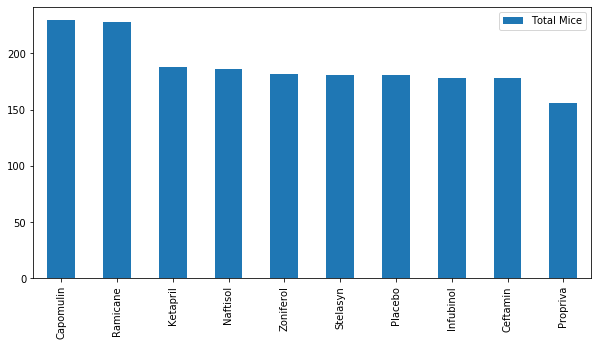

In [27]:
#generate a bar plot using dataframe.plot that shows total mice for each regimen

drug_df = complete_df['Drug Regimen'].value_counts()

regimen_df = pd.DataFrame({'Total Mice': drug_df},
                         index=['Capomulin','Ramicane', 'Ketapril', 'Naftisol',
                               'Zoniferol', 'Stelasyn','Placebo', 'Infubinol',
                               'Ceftamin','Propriva'])
regimen_df.plot.bar(y='Total Mice', figsize=(10,5))

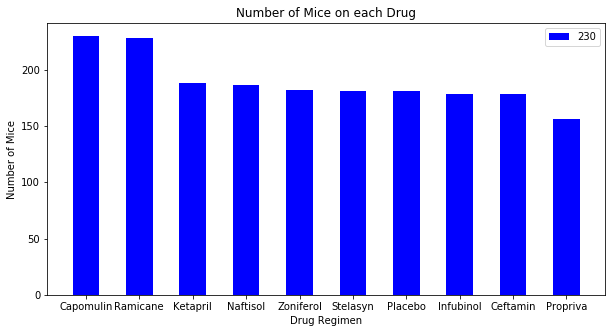

In [26]:
#generate a bar plot using pyplot that shows total mice for each regimen
number_of_mice= regimen_df['Total Mice'].sum()
drugs = ['Capomulin','Ramicane', 'Ketapril', 'Naftisol',
                               'Zoniferol', 'Stelasyn','Placebo', 'Infubinol',
                               'Ceftamin','Propriva']
mice = [230, 228, 188, 186, 182, 181, 181, 178, 178, 156]
fig = plt.figure(figsize= (10, 5))
plt.bar(drugs, mice, color = 'blue', width = 0.5)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice on each Drug")
plt.legend(mice,loc ="upper right")


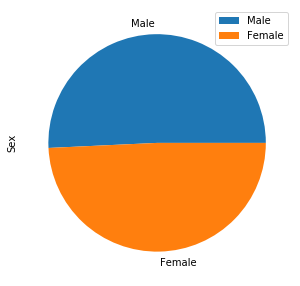

In [28]:
#generate a pie chart using dataframe.plot that shows male and female mice in the study
male_df = complete_df.loc[complete_df['Sex']=='Male']
total_male = male_df['Sex'].count()

female_df = complete_df.loc[complete_df['Sex']=='Female']
total_female = female_df['Sex'].count()

sex_df = pd.DataFrame({'Sex': [total_male, total_female]},
                      index = ['Male','Female'])
                      
sex_df.plot.pie(y='Sex', figsize=(5,5))

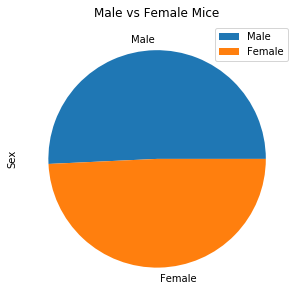

In [29]:
#generate a pie chart using pyplot that shows male and female mice in the study 
fig = plt.figure(figsize= (5,5))

sex = ['Male', 'Female']
mice_s = [958, 930]
plt.pie(mice_s, labels = sex)
plt.title("Male vs Female Mice")
plt.legend(sex, loc = "upper right")
plt.ylabel('Sex')
plt.show()

In [39]:
#calculate the final tumor value across capomulin, ramicane, infubinol, ceftamin
cap_max = capomulin_df['Tumor Volume (mm3)'].min()

ram_max = ramicane_df['Tumor Volume (mm3)'].min()

inf_max = infubinol_df['Tumor Volume (mm3)'].min()

ceft_max = ceftamin_df['Tumor Volume (mm3)'].min()

#not sure on the instructions on this part? for each mouse id?

#calculate the quartiles and IQR and quantitavely determine if there are any potential
#outliers across all four treatment regimens


In [ ]:
#using matplotlib generate a box and a whisker plot of values from above
#highlight and potential outliers by changing their colors 

In [ ]:
#select a mouseID treated with Capomulin and generate line plot of time point vs tumor vol

In [ ]:
#generate scatter plot of mouse wieght vs average tumor volume for capomulin treatment